<a href="https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Parciales/Primer%20Parcial/EjercicioD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 Ejercicio D2 (Regresion Lineal multivariable) Grupo 1
 <h3>Para este parcial se decidio usar la regresion lineal multivariable<h3>
 <HR>
 <h3>
  NOMBRE: POLO ORELLANA BRAYAN SIMON <br>
  CARRERA: INGENIERIA DE SISTEMAS <BR>
  FECHA: 09/04/2024 <BR>

  * [Enlace de invitacion para ser colaborador](https://github.com/bspoloo/SIS420-012024/invitations)
  
  * [Enlace al git hub](https://github.com/bspoloo/SIS420-012024/tree/main/Laboratorios/Laboratorio%204)
  
  * [Enlace al Colab](https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Laboratorios/Laboratorio%204/Regresion%20lineal.ipynb?hl=es#scrollTo=jmDd6cd2hQ_W)
  
 <h3>

Para el parcial se aplico el modelo de Regresion Lineal multivariable donde se hizo uso del dataset para predecir el consumo eléctrico de una casa. El enlace al dataset es [Individual household electric power consumption](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption).

El conjunto de datos, denominado ``household_power_consumption.txt``, contiene un conjunto de entrenamiento del consumo electrico de casas. Este conjunto de datos probablemente incluye varias características relevantes para el consumo electrico o Potencia activa global que es Consumo eléctrico en función de las características del hogar y el tiempo.

## 1. Regresion Lineal Multivariable

Primero se importo todas las librerias necesarias:

In [ ]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# Necesario para graficar superficies 3D
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

#para manejar tiempos
from datetime import datetime

# Modulo de optimizacion en scipy
from scipy import optimize

In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive")

# data = pd.read_csv('/content/gdrive/MyDrive/Datasets/household_power_consumption.txt', delimiter=';')

### 1.1 Cargamos los datos del dataset
Cargamos los datos haciendo el uso de la libreria **Pandas** que  es una herramienta poderosa y versátil utilizada para manipulación y análisis de datos. Ofrece estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como hojas de cálculo en Excel o tablas SQL:

In [ ]:
#cargamos el dataset a un dataframe
df = pd.read_csv('household_power_consumption.txt', delimiter=';')

#mostramos el dataset
df

C:\Users\ANIMETX\AppData\Local\Temp\ipykernel_10860\3933941682.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


### 1.2 Analisis del dataset
Hacemos un analisis del dataset mostrando su informacion usando la funcion de `info()`:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Se puede notar que la mayoria de las columnas contienen datos de tipo `object` lo cual se debe convertir a un numero

Primero Convertimos `Date` y `Time` a datos numericos:

Para el `Date` nos basamos en cuantos años es en total, y para el `Time` convertirlo a horas en transcurridas en total:

In [ ]:
# Suponiendo que tu DataFrame se llama df y la columna de fecha se llama 'Date'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculamos la fracción del año con los días como decimales
df['Date'] = df['Date'].dt.year + df['Date'].dt.dayofyear / 365.25

# Convertimos la fracción del año a tipo de dato entero
df['Date'] = (df['Date'] * 1000).astype(int) / 1000  # Redondeamos a 3 decimales

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006.958,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006.958,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006.958,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006.958,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006.958,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010.903,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010.903,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,2010.903,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010.903,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
# Convertir la columna 'Time' a formato de tiempo
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Calcular las horas transcurridas desde la medianoche
df['Time'] = df['Time'].apply(lambda x: x.hour + x.minute / 60 + x.second / 3600)

# Imprimir el DataFrame para verificar los cambios
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006.958,17.400000,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006.958,17.416667,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006.958,17.433333,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006.958,17.450000,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006.958,17.466667,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010.903,20.966667,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010.903,20.983333,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,2010.903,21.000000,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010.903,21.016667,0.934,0.0,239.7,3.8,0.0,0.0,0.0


Se reemplazaran los datos con **"?"**, que representan datos faltantes o desconocidos, estos seran reemplazados con el valor 0:

In [ ]:
#Ponemos 0 a los datos que tienen `?`
#a partir de la columna 3

# Reemplaza los valores "?" con 0 en las columnas desde la tercera en adelante
df = df.replace('?', 0)


Convertimos los datos de tipo object a datos de tipo float:

In [ ]:
df['Date'] = df['Date'].astype(float)
df['Time'] = df['Time'].astype(float)
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df['Sub_metering_3'] = df['Sub_metering_3'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   float64
 1   Time                   float64
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(9)
memory usage: 142.5 MB


Ahora tenemos que analizar que columnas contienen datos con NAN, para eso mostramos que columnas tienen NAN en sus datos:

In [ ]:
df = pd.DataFrame(df)
nan_counts = df.isnull().sum()
print(nan_counts)

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


Como se puede ver la columna `SUb_metering_3`tiene **25979** datos que contienen NAN, para esto solucionaremos insertando la media de esa columan a cada lugar donde este un NAN:

In [ ]:
# Calcular la media de cada columna
column_means = df.mean()

# Reemplazar los valores NaN con la media de cada columna
df = df.fillna(column_means)

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006.958,17.400000,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006.958,17.416667,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006.958,17.433333,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006.958,17.450000,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006.958,17.466667,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010.903,20.966667,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010.903,20.983333,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010.903,21.000000,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010.903,21.016667,0.934,0.000,239.70,3.8,0.0,0.0,0.0


Comprobamos que ya no haya datos NAN:

In [ ]:
df = pd.DataFrame(df)
nan_counts = df.isnull().sum()
print(nan_counts)

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


Se observa que ya no hay datos NAN en la matriz, esto nos evitara errores al momento del calculo de thetas o entrenamiento del modelo.

### 1.3 Separacion del 80% de los datos para entrenamiento y 20% para pruebas

Haremos uso de la libreria `sklearn` haciendo uso de su funcion `train_test_split()`, donde recibe como parametros:

`Arrays o matrices de características (X): `Estos son los datos que se utilizarán para hacer predicciones. Por lo general, son las variables independientes o características del conjunto de datos.

`test_size (opcional):` Este parámetro especifica el tamaño del conjunto de prueba. Puede ser un número decimal entre 0 y 1, que representa el porcentaje del conjunto de datos que se asignará al conjunto de prueba, o puede ser un entero que representa el número absoluto de muestras en el conjunto de prueba. Por ejemplo, si test_size=0.2, se asignará el 20% del conjunto de datos al conjunto de prueba.

`train_size (opcional):` Este parámetro especifica el tamaño del conjunto de entrenamiento. Al igual que test_size, puede ser un número decimal entre 0 y 1 o un entero que representa el número absoluto de muestras en el conjunto de entrenamiento. Si no se proporciona, se calcula automáticamente como 1 - test_size.

`random_state (opcional):` Este parámetro permite establecer una semilla para la generación de números pseudoaleatorios. Esto garantiza que la división de los datos sea reproducible. Si se establece en un número entero, el resultado será el mismo cada vez que se ejecute el código.

In [ ]:
#separamos el 20% para test y el 80% para entrenamiento deld dataset
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

# Seleccionamos las columnas para X y la columna 'price' para y
X_test = test_dataset.drop(['Global_active_power'], axis=1).values
y_test = test_dataset['Global_active_power'].values
m_test = len(y_test)

# Seleccionamos las columnas para X y la columna 'price' para y
X_train = train_dataset.drop(['Global_active_power'], axis=1).values
y_train = train_dataset['Global_active_power'].values
m_train = len(y_train)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'Y'
))
print('-' * 90)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:14.3f}'.format(
        X_train[i, 0],
        X_train[i, 1],
        X_train[i, 2],
        X_train[i, 3],
        X_train[i, 4],
        X_train[i, 5],
        X_train[i, 6],
        X_train[i, 7],
        y_train[i]
    ))


    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]         Y
------------------------------------------------------------------------------------------
  2009.520    15.267     0.000   244.740     0.800     0.000     0.000     0.000         0.192
  2007.678    12.200     0.000   240.600     0.600     0.000     0.000     0.000         0.130
  2007.492     6.450     0.098   242.400     1.000     0.000     0.000     0.000         0.208
  2008.235    13.733     0.086   243.920     1.400     0.000     0.000     0.000         0.318
  2010.646    22.950     0.098   244.250     1.800     0.000     1.000     1.000         0.382
  2008.884     8.650     0.056   236.140     5.800     1.000     0.000    17.000         1.366
  2007.035    15.717     0.182   241.340     9.200     0.000     2.000    18.000         2.244
  2009.643    16.467     0.386   239.760     4.600     0.000     2.000    13.000         1.038
  2007.854     1.117     0.212   243.260     2.000     0.0

### 1.3 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.


Hacemos el uso de la siguiente funcion para normalizar los datos:

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalizamos los datos e Imprimimos algunos datos normalizados:

In [ ]:
print(X_train.shape[1])
X_norm, mu, sigma = featureNormalize(X_train)
# imprimir todos las X de datos solo 10
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]'
))
print('-' * 80)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm[i, 0],
        X_norm[i, 1],
        X_norm[i, 2],
        X_norm[i, 3],
        X_norm[i, 4],
        X_norm[i, 5],
        X_norm[i, 6],
        X_norm[i, 7],
    ))

8
    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]
--------------------------------------------------------------------------------
     0.517     0.473    -1.083     0.256    -0.848    -0.181    -0.222    -0.770
    -1.101     0.030    -1.083     0.103    -0.893    -0.181    -0.222    -0.770
    -1.264    -0.800    -0.214     0.170    -0.803    -0.181    -0.222    -0.770
    -0.612     0.251    -0.320     0.226    -0.713    -0.181    -0.222    -0.770
     1.506     1.582    -0.214     0.238    -0.623    -0.181    -0.049    -0.651
    -0.042    -0.482    -0.586    -0.063     0.277    -0.017    -0.222     1.258
    -1.665     0.538     0.531     0.130     1.042    -0.181     0.124     1.377
     0.625     0.646     2.339     0.072     0.007    -0.181     0.124     0.780
    -0.946    -1.570     0.797     0.201    -0.578    -0.181    -0.222    -0.770
    -0.311    -0.487    -0.161    -0.032     0.412    -0.017     0.124     1.377


### 1.4 Graficar las caracteristicas
 Graficamos cada caracteristica respecto a Y, esto para ver la relacion entre estos.

In [ ]:
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')

    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)

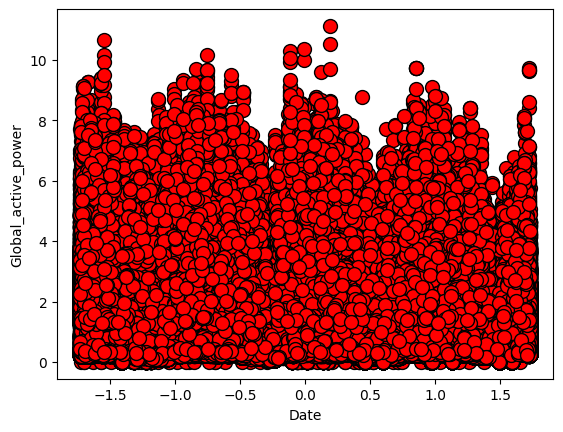

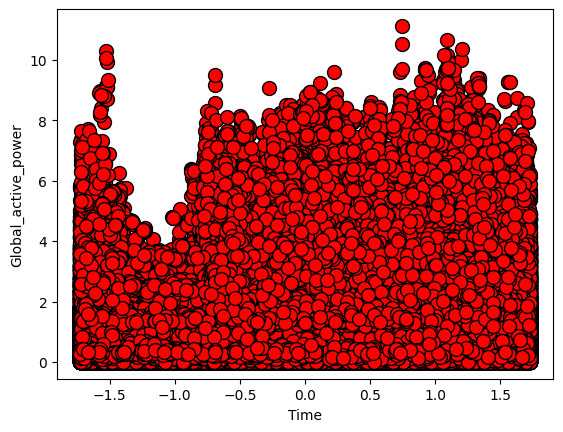

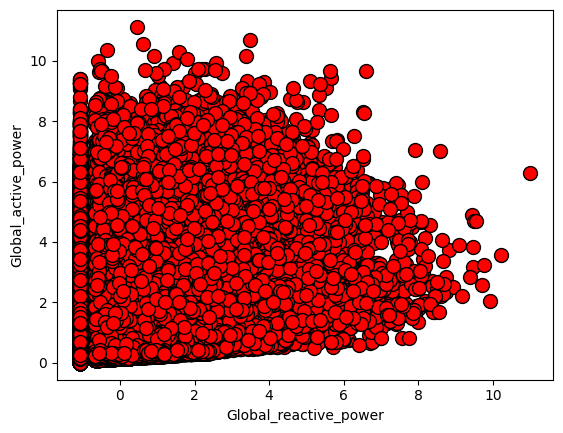

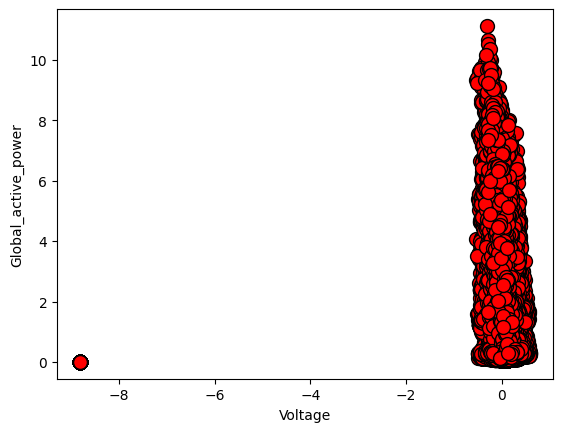

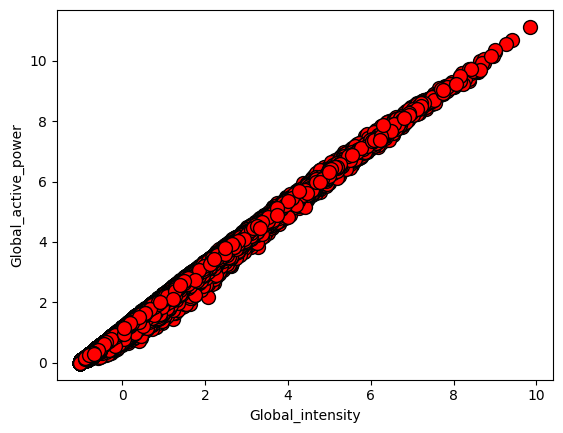

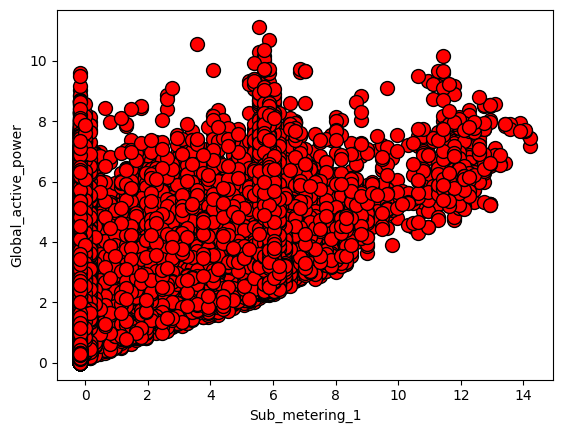

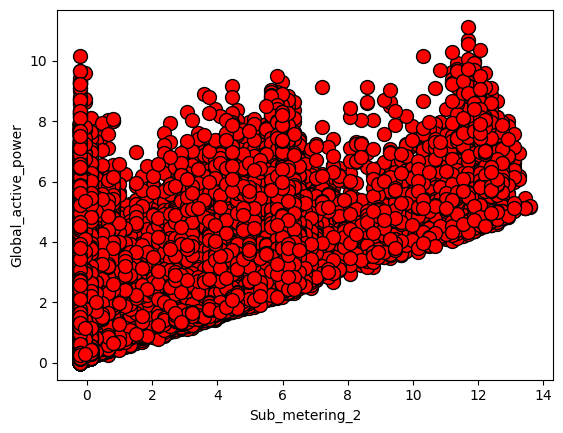

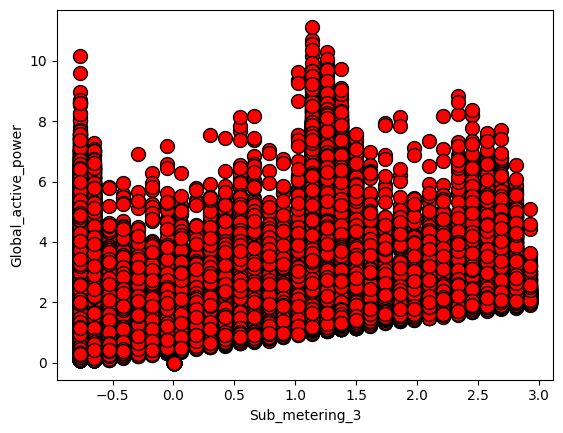

In [ ]:
xlabel1 = "Date"
xlabel2 = "Time"
xlabel3 = "Global_reactive_power"
xlabel4 = "Voltage"
xlabel5 = "Global_intensity"
xlabel6 = "Sub_metering_1"
xlabel7 = "Sub_metering_2"
xlabel8 = "Sub_metering_3"


ylabel = "Global_active_power"

graficarDatos(X_norm[:, 0], y_train, xlabel1, ylabel)
graficarDatos(X_norm[:, 1], y_train, xlabel2, ylabel)
graficarDatos(X_norm[:, 2], y_train, xlabel3, ylabel)
graficarDatos(X_norm[:, 3], y_train, xlabel4, ylabel)
graficarDatos(X_norm[:, 4], y_train, xlabel5, ylabel)
graficarDatos(X_norm[:, 5], y_train, xlabel6, ylabel)
graficarDatos(X_norm[:, 6], y_train, xlabel7, ylabel)
graficarDatos(X_norm[:, 7], y_train, xlabel8, ylabel)




### 1.5 Añadimos la columna de unos
 graficamos cada caracteristica respecto a Y, esto para ver la relacion entre estos.

In [ ]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

print(X_ready.shape)
# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]' ))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_ready[i, 0],
        X_ready[i, 1],
        X_ready[i, 2],
        X_ready[i, 3],
        X_ready[i, 4],
        X_ready[i, 5],
        X_ready[i, 6],
        X_ready[i, 7],
        X_ready[i, 8]))

(1660207, 9)
    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]   X[:, 8]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.000     0.517     0.473    -1.083     0.256    -0.848    -0.181    -0.222    -0.770
     1.000    -1.101     0.030    -1.083     0.103    -0.893    -0.181    -0.222    -0.770
     1.000    -1.264    -0.800    -0.214     0.170    -0.803    -0.181    -0.222    -0.770
     1.000    -0.612     0.251    -0.320     0.226    -0.713    -0.181    -0.222    -0.770
     1.000     1.506     1.582    -0.214     0.238    -0.623    -0.181    -0.049    -0.651
     1.000    -0.042    -0.482    -0.586    -0.063     0.277    -0.017    -0.222     1.258
     1.000    -1.665     0.538     0.531     0.130     1.042    -0.181     0.124     1.377
     1.000     0.625     0.646     2.339     0.072     0.007    -0.181     0.1

### 1.6 Descenso por el gradiente

#### 1.6.1 Cálculo del costo $J(\theta)$

La funcion de costo es una medida que se utiliza para evaluar qué tan bien está funcionando un modelo de aprendizaje automático en la tarea que se le ha asignado. Su objetivo principal es cuantificar la discrepancia entre las predicciones del modelo y los valores reales observados en los datos de entrenamiento.

In [ ]:
def calcularCosto(X, y, theta, lambda_):
    m = y.size
    J = 0

    #creamos una varable temporal para theta, donde decimos que el primer valor de temp es 0, esto para respetar la formula donde j = 1
    temp = theta.copy()
    temp[0] = 0  # Excluimos theta_0 de la regularización
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [ ]:
theta =np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7])
theta1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7])

print(theta.shape[0])
# theta1=np.array([0.5, 7.0, 0.2])

lambda_ = 1000

print(f"########################################################################################################")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_ready, y_train, theta, lambda_)}")
print(f"########################################################################################################")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_ready, y_train, theta1, lambda_)}")

9
########################################################################################################
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7] se obtiene un costo de: 10.646110272292658
########################################################################################################
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3 8.  1.7] se obtiene un costo de: 68.18387707350946


#### 1.6.2 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$.

Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico.


Tambien introducimos el parametro lambda_ para aplicar regularizacion.

Para el calculo de nuestras thetas sera

para Theta 0 sera `theta[0] = theta[0] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 0]))`.

Para las demas thetas sera `theta[1:] = theta[1: ] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 1:])) - (alpha * lambda_ / m) * theta[1:]`

In [ ]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):
        # theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        theta[0] = theta[0] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 0]))
        theta[1:] = theta[1: ] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 1:])) - (alpha * lambda_ / m) * theta[1:]

        J_historico.append(calcularCosto(X, y, theta, lambda_))

    return theta, J_historico

Se inicializan los parametros $\theta$ con ceros de longitud 9, la taza de aprendizaje $\alpha$ con 0.00009 y un numero de iteraciones de 5000.

In [ ]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(X_train.shape[1] + 1)

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite = 5000
alpha = 0.0009
lambda_ = 1000

theta, J_historico = calcularDescensoGradiente(X_ready, y_train, theta, alpha, num_ite, lambda_)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")
print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo

########################################################################################################
Los valores de theta calculados son:
theta 1: 1.065841925323922
theta 2: -0.01930991705591874
theta 3: 0.0442679666334247
theta 4: 0.013099757740448161
theta 5: 0.028092009256676514
theta 6: 0.7507449079026651
theta 7: 0.13002017015787334
theta 8: 0.11617462541226344
theta 9: 0.20302468087710768
########################################################################################################
con un costo de: 0.013137390866072338 


### 1.7 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

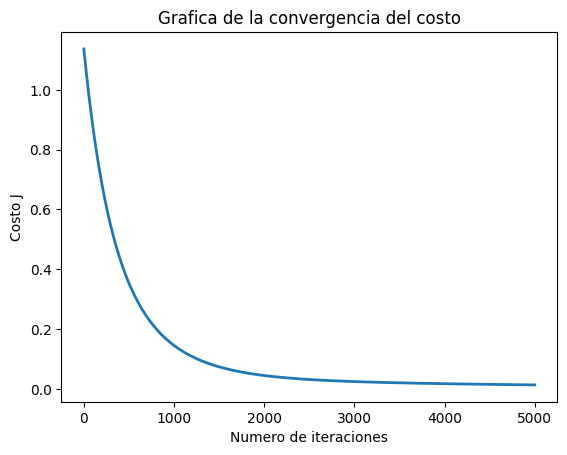

In [ ]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Se puede observar que la grafica de convergencia del costo es aceptable evitando el overfiting.

### 1.8 Grafica de la regresion lineal
En esta parte se trazan los datos de entrenamiento y una línea que representa la regresión lineal ajustada a esos datos.

C:\Users\ANIMETX\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\ANIMETX\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


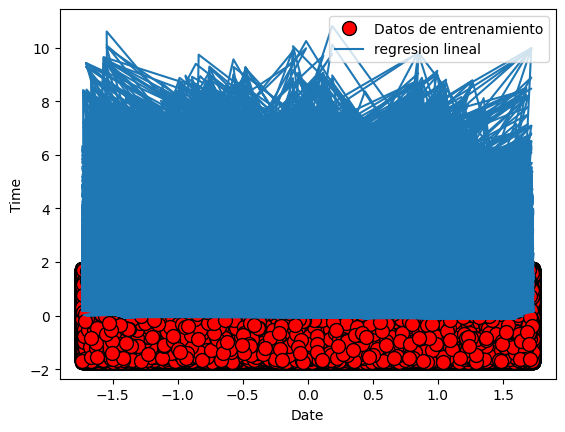

In [ ]:
pyplot.rcParams['agg.path.chunksize'] = 10000  # Ajusta el tamaño del bloque de la ruta de renderizado


graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:,1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

haciendo una prediccion de prueba:

In [ ]:
X_array = np.array([ 1,2010.646,22.950,0.098,244.250,1.800,0.000,1.000,1.000])
X_array = X_array.reshape(1, -1)

X_array[:, 1:] = (X_array[:, 1:] - mu) / sigma

prediccion = np.dot(X_array, theta)

print (f"La prediccion de la casa es de: {prediccion}")

La prediccion de la casa es de: [0.4817864]


### 1.9 Ejemplos de Predicciones
Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

In [ ]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos = np.array([
    [1, 2006.34 , 20.23 ,0.000,233.780,14.000,0.000,0.000,17.000],
    [1, 2006.54 , 20.23 ,0.080,233.690,14.400,0.000,0.000,17.000],
    [1, 2006.76 , 20.43 ,0.144,234.040,14.600,0.000,0.000,17.000],
    [1, 2006.32 , 20.65 ,0.142,233.930,14.600,0.000,0.000,16.000],
    [1, 2006.92 , 20.67 ,0.140,233.620,14.400,0.000,0.000,17.000],
    [1, 2006.93 , 20.98 ,0.140,233.640,14.400,0.000,0.000,17.000],
    [1, 2006.45 , 20.22 ,0.140,233.260,14.400,0.000,0.000,16.000],
    [1, 2006.65 , 20.23 ,0.086,233.900,14.400,0.000,0.000,17.000],
    [1, 2006.56 , 20.43 ,0.000,233.680,14.200,0.000,0.000,17.000],
    [1, 2006.78 , 20.54 ,0.000,232.830,14.200,0.000,0.000,17.000],
    [1, 2006.09 , 20.65 ,0.000,233.000,14.200,0.000,0.000,16.000]
])

#creamos un vector parta almacenar cada Y predicha
y_pre = []
matriz_datos_copy = matriz_datos.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos_copy[:, 1:] = (matriz_datos_copy[:, 1:] - mu) / sigma


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_copy:
    y_pre.append(np.dot(datos, theta))

matriz_datos = np.column_stack((matriz_datos, y_pre))

nombres_columnas = ['Date', 'Time', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Global_active_power']
# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos.tolist()

print(len(matriz_datos[0]))
print(len(matriz_datos_copy[0]))

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

10
9
+----+---------+--------+-------------------------+-----------+--------------------+------------------+------------------+------------------+-----------------------+
|    |    Date |   Time |   Global_reactive_power |   Voltage |   Global_intensity |   Sub_metering_1 |   Sub_metering_2 |   Sub_metering_3 |   Global_active_power |
+====+=========+========+=========================+===========+====================+==================+==================+==================+=======================+
|  1 | 2006.34 |  20.23 |                   0     |    233.78 |               14   |                0 |                0 |               17 |               2.94251 |
+----+---------+--------+-------------------------+-----------+--------------------+------------------+------------------+------------------+-----------------------+
|  1 | 2006.54 |  20.23 |                   0.08  |    233.69 |               14.4 |                0 |                0 |               17 |               3.01586 |

### 1.10 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

#### 1.10.1 Creacion de la funcion del error cuadratico medio
Se crea la funcion para hacer las comparaciones par ver que tanto se aleja nuestra prediccion de nuestra y_predicha.

In [ ]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pre)

#### 1.10.2 haciendo calculo del error cuadratico medio

In [ ]:
#haciendo x_test que es el 20% restante
m_ready = len(y_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready, 1)), X_test], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos_test in X_ready_test:
    datos_test[1:] = (datos_test[1:] - mu) / sigma

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta))

mse = mean_squared_error(y_predicha, y_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 969.9523469447821
Raíz del Error Cuadrático Medio (RMSE) = 31.144057971702757
